In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
import pandas as pd
import scipy as sp
from scipy import signal

In [7]:
#Importación de archivos de EEG
eeg_mi = pd.read_csv('imaginacion_motora.csv', sep=',', encoding='latin-1') 
eeg_mi.head()
eeg_mi = eeg_mi.to_numpy()
eeg_mi = np.stack(eeg_mi, axis=1)
eeg_mi_nonfilt = eeg_mi[0,:]
eeg_mi_filt = eeg_mi[1,:]

In [8]:
fs = 200
duration = fs*15*100
t = np.arange(0,duration, 1/fs )
N = fs*10

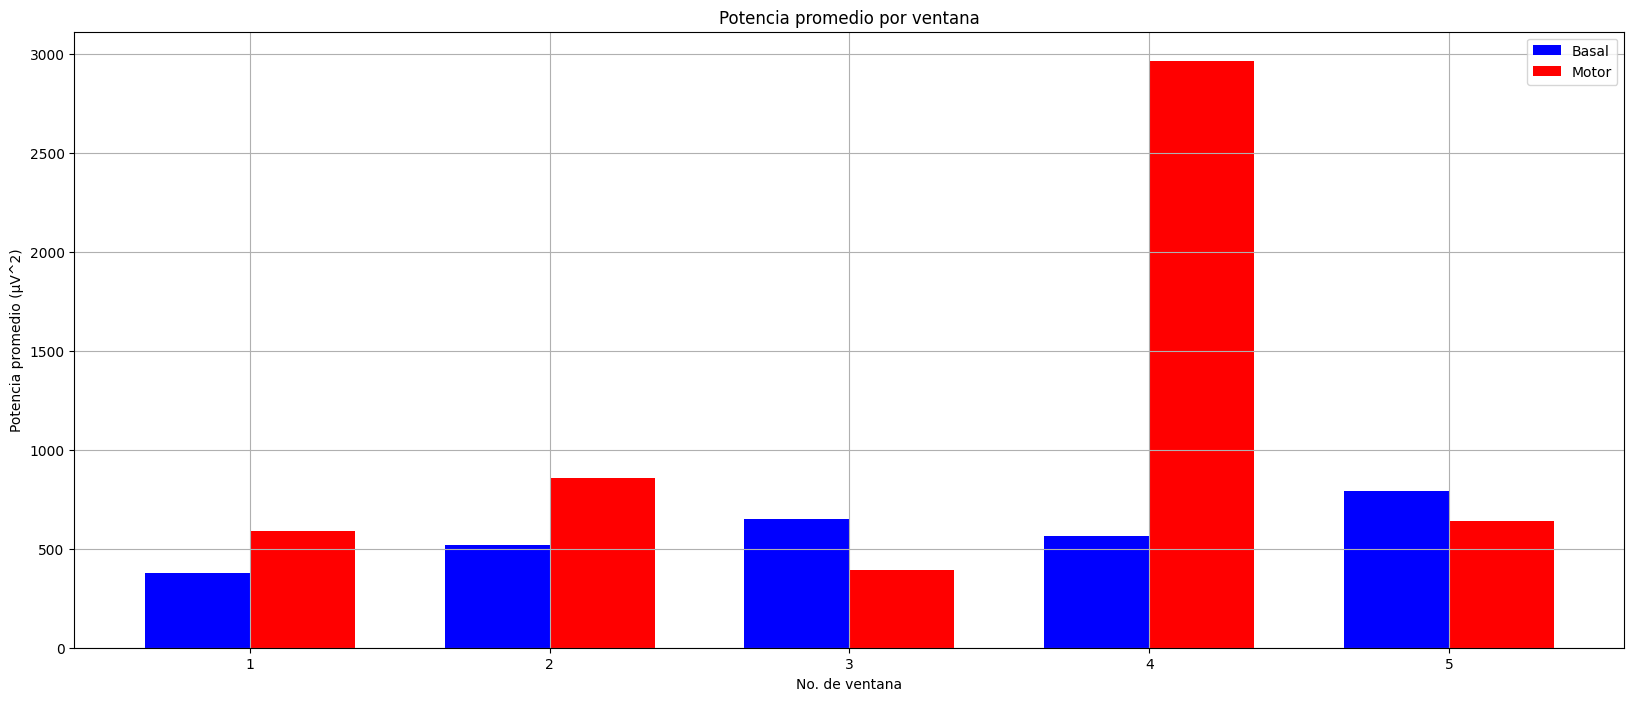

In [9]:
#Establecer las instancias
w1_basal = eeg_mi_filt[0:N]
w1_motora = eeg_mi_filt[N+1:2*N]
w2_basal = eeg_mi_filt[2*N+1:3*N]
w2_motora = eeg_mi_filt[3*N+1:4*N]
w3_basal = eeg_mi_filt[4*N+1:5*N]
w3_motora = eeg_mi_filt[5*N+1:6*N]
w4_basal = eeg_mi_filt[6*N+1:7*N]
w4_motora = eeg_mi_filt[7*N+1:8*N]
w5_basal = eeg_mi_filt[8*N+1:9*N]
w5_motora = eeg_mi_filt[9*N+1:10*N]
basal = [w1_basal, w2_basal, w3_basal, w4_basal, w5_basal]
motor = [w1_motora, w2_motora, w3_motora, w4_motora, w5_motora]

#Cálculo de la potencia promedio por ventana
power_basal = []
power_motora = []
for w in basal:
  power_basal.append(np.mean(np.power(w,2)))
for w in motor:
  power_motora.append(np.mean(np.power(w,2)))

#Guardar los datos en formato CSV
data = {'basal': power_basal, 'motor': power_motora}
df = pd.DataFrame(data)
df.to_csv('caracteristicas.csv', index=False)

# Graficar los datos
bar_width = 0.35  
x_pos = np.arange(len(power_basal)) 
plt.figure(figsize=(20, 8)) 
plt.bar(x_pos, power_basal, bar_width, label='Basal', color='b')
plt.bar(x_pos + bar_width, power_motora, bar_width, label='Motor', color='r') 
plt.xlabel('No. de ventana')
plt.ylabel('Potencia promedio (µV^2)')
plt.title('Potencia promedio por ventana')
plt.xticks(x_pos + bar_width / 2, ['1', '2', '3', '4', '5'])  # Set x-axis labels
plt.legend()
plt.grid(True)
plt.show()

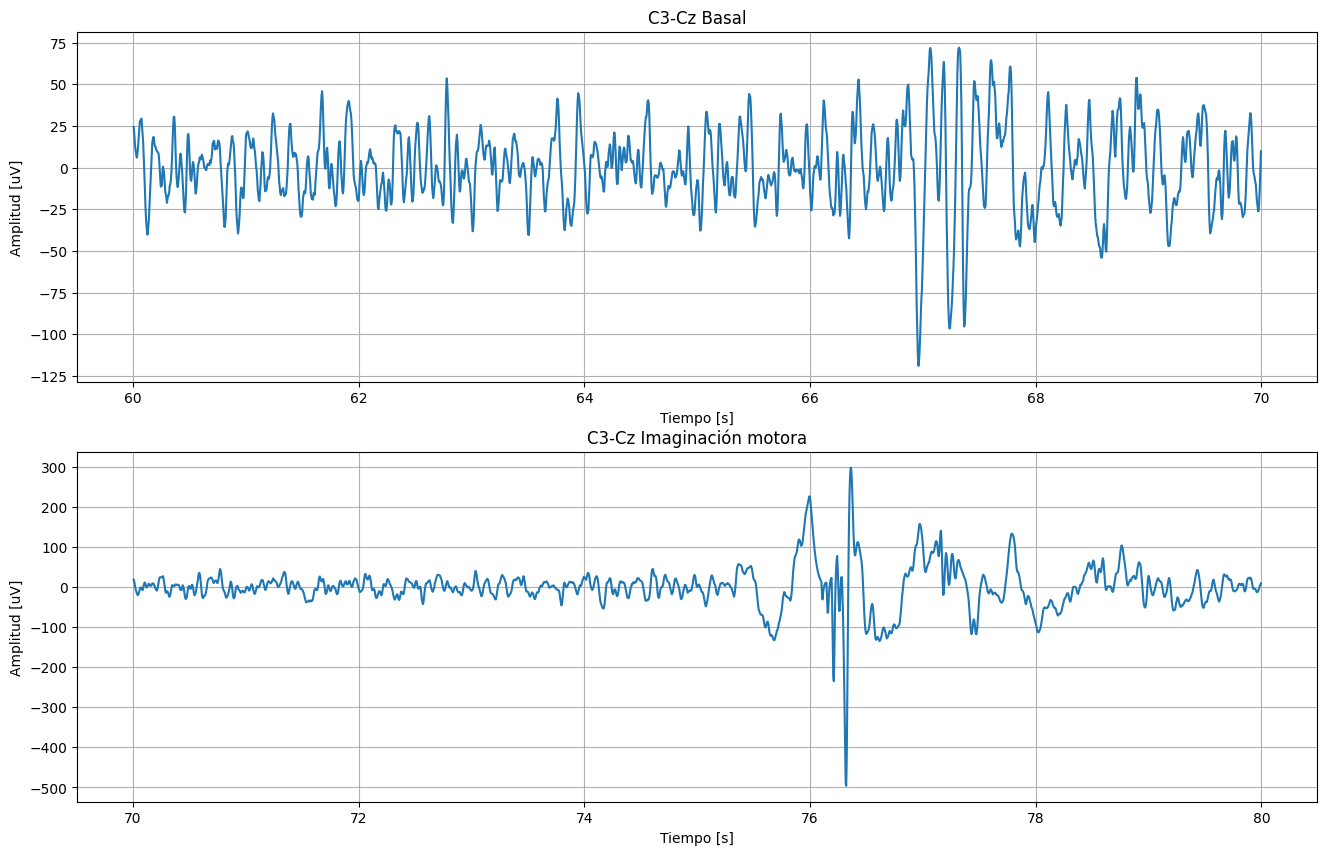

In [10]:
fig, axs = plt.subplots(2, 1, figsize=(16, 10))
axs[0].plot(t[N*6+1:N*7], eeg_mi_filt[N*6+1:N*7])
axs[1].plot(t[N*7+1:N*8], eeg_mi_filt[N*7+1:N*8])
axs[0].set_title('C3-Cz Basal')
axs[0].set_xlabel('Tiempo [s]')
axs[0].set_ylabel('Amplitud [uV]')
axs[0].grid(True)

axs[1].set_title('C3-Cz Imaginación motora')
axs[1].set_xlabel('Tiempo [s]')
axs[1].set_ylabel('Amplitud [uV]')
axs[1].grid(True)

plt.show()